In [32]:
import pyautogui
import cv2
import numpy as np
import shapely
import matplotlib.pyplot as plt

In [2]:
print(pyautogui.size())
print(pyautogui.position()) #returns mouse postion

Size(width=1920, height=1200)
Point(x=2581, y=310)


In [3]:
 pyautogui.moveTo(100, 200)

In [4]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [11]:
mouse_events = [] 
coords = []
        
def track_mouse_events(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_events.append([x,y])
        print(x,y)
        
        if len(mouse_events) >= 4:
            pts = np.array(mouse_events, np.int32)
            pts = pts.reshape((-1,1,2))
            im = orig_img.copy()
            
            cv2.polylines(orig_img,[pts],True,(0,255,255))
            
            
orig_img = cv2.imread(r"C:\Users\ksied\Desktop\KS\python_repo\GUI\orig.png")
rangeland_img = cv2.imread(r"C:\Users\ksied\Desktop\KS\python_repo\GUI\rangleland.png")

cv2.namedWindow('image')
cv2.setMouseCallback('image', track_mouse_events)

while(1):
    cv2.imshow('image', orig_img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

249 286
248 200
399 246
349 361


In [ ]:
def get_danger_zone_pixel_mask(pixels, img):
    """Generate image shape mask based on pixel danger zone coordinates
    
    :param pixels: pixel positions of polygon vertex 
    :type pixels: list of touples
    :param img: image 
    :type img: numpy array
    """

    mask = np.zeros_like(img)
    cv2.fillConvexPoly(mask, pixels, (255, 0, 0), 1)
    return mask

def visualize_danger_zone(img, pixel_mask, alpha = 1, beta =0.6):
    """Visualize danger zone on image
    
    :param img: image to draw danger zone one
    :type img: numpy array
    :param pixel_mask: pixel mask with shape same as img
    :type pixel_mask: numpy array
    :param alpha: image weight, defaults to 1
    :param alpha: int, optional
    :param beta: danger zone weight, defaults to 0.6
    :param beta: float, optional
    """

    img_trans = cv2.addWeighted(img, alpha, pixel_mask, 0.6, 0)
    plt.imshow(img_trans)
    return img_trans

In [66]:
mouse_events = [] 
coords = []
        
def track_mouse_events(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_events.append([x,y])
        
        pts = np.array(mouse_events, np.int32)
        pts = pts.reshape((-1,1,2))
        mask = np.zeros_like(orig_img)
        
        
        
        if len(mouse_events) >= 3:
            #cv2.polylines(orig_img,[pts],True,(0,255,255))
            
            lol = cv2.fillConvexPoly(mask, pts, (255, 0, 0), 1)
            img_trans = cv2.addWeighted(orig_img, 1, mask, 0.6, 0)
            
            cv2.imshow('lol', lol)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            

            
            
orig_img = cv2.imread(r"C:\Users\ksied\Desktop\KS\python_repo\GUI\orig.png")
rangeland_img = cv2.imread(r"C:\Users\ksied\Desktop\KS\python_repo\GUI\rangleland.png")

cv2.namedWindow('image')
cv2.setMouseCallback('image', track_mouse_events)

while(1):
    cv2.imshow('image', orig_img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [57]:
contour2

NameError: name 'contour2' is not defined

In [12]:
coords = mouse_events.copy()

In [13]:
coords

[[249, 286], [248, 200], [399, 246], [349, 361]]

In [15]:
shapely.Point(0,0).convex_hull

AttributeError: module 'shapely' has no attribute 'Point'

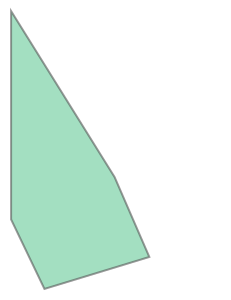

In [41]:
from shapely.geometry import MultiPoint
contour = MultiPoint(coords).convex_hull
contour

In [42]:
list(contour.exterior.coords)

[(248.0, 200.0),
 (200.0, 300.0),
 (200.0, 600.0),
 (349.0, 361.0),
 (399.0, 246.0),
 (248.0, 200.0)]

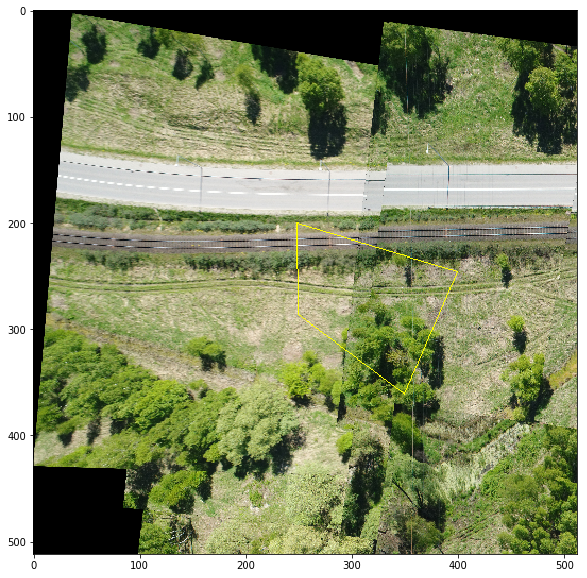

In [37]:
plt.figure(figsize=(10,10))
ax = plt.imshow(cv2.cvtColor(orig_img,cv2.COLOR_BGR2RGB))

AttributeError: 'AxesImage' object has no attribute 'plot'

In [26]:
coords.append([200,600])